In [24]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_curve
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.preprocessing import label_binarize
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, ExtraTreesClassifier, AdaBoostClassifier, GradientBoostingClassifier, StackingClassifier

In [25]:
data = pd.read_csv('conference\Acc_Clean_datamulti.csv')
data

,Day of the week,Is weekend,Holiday,Is in school zone,Intersection,On state highway,Urban or open speed zone,Junction type,Road curvature,Gradient,...,Primary surface condition,Natural Light,Primary weather,Alcohol Suspected,Drugs Involved,Licence type,Licence status,Road user age,Gender,CrashSeverity
0,1,0,0,1,1,0,0,6,1,1,...,1,1,1,0,0,1,1,54,2,2
1,2,0,0,0,0,0,0,1,0,0,...,1,1,1,1,0,1,1,82,2,2
2,6,1,0,1,1,0,0,6,0,0,...,1,2,1,0,0,1,1,63,2,2
3,2,0,0,1,1,0,0,2,0,0,...,1,1,1,1,0,1,3,28,1,2
4,1,0,0,1,1,0,0,6,1,0,...,1,3,1,0,0,1,1,23,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13770,3,0,0,1,0,0,0,8,0,0,...,1,1,1,0,0,1,1,29,1,1
13771,1,0,1,1,1,0,0,2,0,1,...,1,2,1,0,0,1,1,54,1,2
13772,6,1,0,1,0,0,0,1,0,0,...,1,2,1,1,0,5,1,17,1,2
13773,6,1,0,1,1,0,0,6,0,0,...,1,4,1,0,0,1,1,61,1,2


In [26]:
x=data[[ 'Day of the week', 'Is weekend', 'Holiday', 'Is in school zone', 'Intersection', 'On state highway', 'Urban or open speed zone',  'Junction type', 'Road curvature', 'Gradient', 'Surface type', 'Primary surface condition', 'Natural Light', 'Primary weather', 'Alcohol Suspected', 'Drugs Involved', 'Licence type', 'Licence status ', 'Road user age', 'Gender']]


In [27]:
y=data["CrashSeverity"]


In [28]:
from collections import Counter
counter = Counter(y)
for k,v in counter.items():
  dist = round(v / len(y) * 100, 2)
  print(f"Class={k}, n={v} ({dist})")

Class=2, n=5961 (43.27)
Class=1, n=6243 (45.32)
Class=3, n=1403 (10.19)
Class=4, n=168 (1.22)


<BarContainer object of 4 artists>

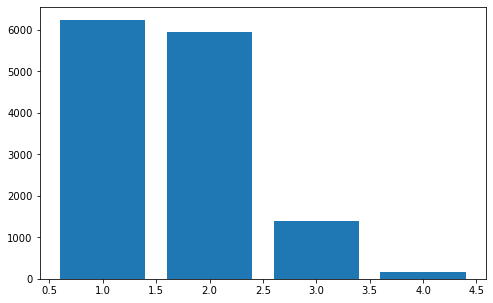

In [29]:
plt.figure(1, figsize=(8, 5))
plt.bar(counter.keys(), counter.values())

In [30]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import  Pipeline

In [31]:
oversample = SMOTE()
undersample = RandomUnderSampler()
steps = [("o", oversample), ("u", undersample)]
pipeline = Pipeline(steps=steps)
x, y =pipeline.fit_resample(x, y)

In [32]:
counter = Counter(y)
for k,v in counter.items():
  dist = v / len(y) * 100
  print(f"Class={k}, n={v} ({dist})")

Class=1, n=6243 (25.0)
Class=2, n=6243 (25.0)
Class=3, n=6243 (25.0)
Class=4, n=6243 (25.0)


<BarContainer object of 4 artists>

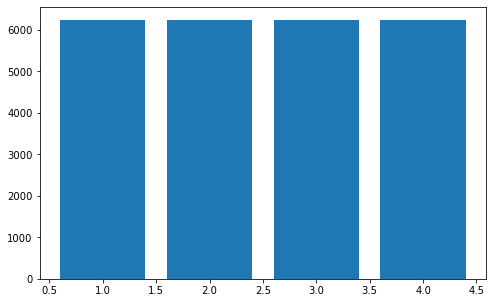

In [33]:
plt.figure(1, figsize=(8, 5))
plt.bar(counter.keys(), counter.values())

#OLS test

In [34]:
import statsmodels.api as sm
X_train, X_test, Y_train, Y_test = train_test_split(x, y, train_size=0.80)
X2 = sm.add_constant(X_train)
est = sm.OLS(Y_train, X2)
est2 = est.fit()
print(est2.summary())


                            OLS Regression Results                            
Dep. Variable:          CrashSeverity   R-squared:                       0.328
Model:                            OLS   Adj. R-squared:                  0.327
Method:                 Least Squares   F-statistic:                     487.0
Date:                Sun, 17 Oct 2021   Prob (F-statistic):               0.00
Time:                        00:37:36   Log-Likelihood:                -26617.
No. Observations:               19977   AIC:                         5.328e+04
Df Residuals:                   19956   BIC:                         5.344e+04
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [35]:
from sklearn.metrics import accuracy_score, confusion_matrix, mean_squared_error
from sklearn import datasets
from sklearn.inspection import partial_dependence
from sklearn.inspection import plot_partial_dependence
from sklearn.inspection import permutation_importance

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

X_train, X_test, Y_train, Y_test = train_test_split(x, y, train_size=0.80)


In [42]:
clf_models = []
clf_models.append(('Ada',   GaussianNB()))
for name, model in clf_models:
   exec(f'clf_{name} = model.fit(X_train, Y_train)')
   msg = "Model: clf_%s , Score:%.2f" % (name, model.score(X_train, Y_train))
   print(msg)
   print(confusion_matrix(Y_test, model.predict(X_test)))
   print('')

Model: clf_Ada , Score:0.44
[[512 143 406 201]
 [363 197 499 172]
 [165  96 668 311]
 [ 54  15 370 823]]



#Permutation Test

Feature:, value: %.5f (Index(['Junction type', 'Day of the week', 'Licence type', 'Is weekend',
       'Primary surface condition', 'Road curvature', 'Natural Light',
       'Road user age', 'Licence status ', 'Surface type',
       'Urban or open speed zone', 'On state highway', 'Primary weather',
       'Is in school zone', 'Intersection', 'Holiday', 'Gradient', 'Gender',
       'Alcohol Suspected', 'Drugs Involved'],
      dtype='object'), array([0.0003604 , 0.00088099, 0.00106519, 0.00140157, 0.00146564,
       0.00180202, 0.00189813, 0.00229857, 0.00386032, 0.00423675,
       0.00621496, 0.00760852, 0.00855358, 0.00896204, 0.01140477,
       0.01219766, 0.01784399, 0.01993433, 0.03055422, 0.03177959]))


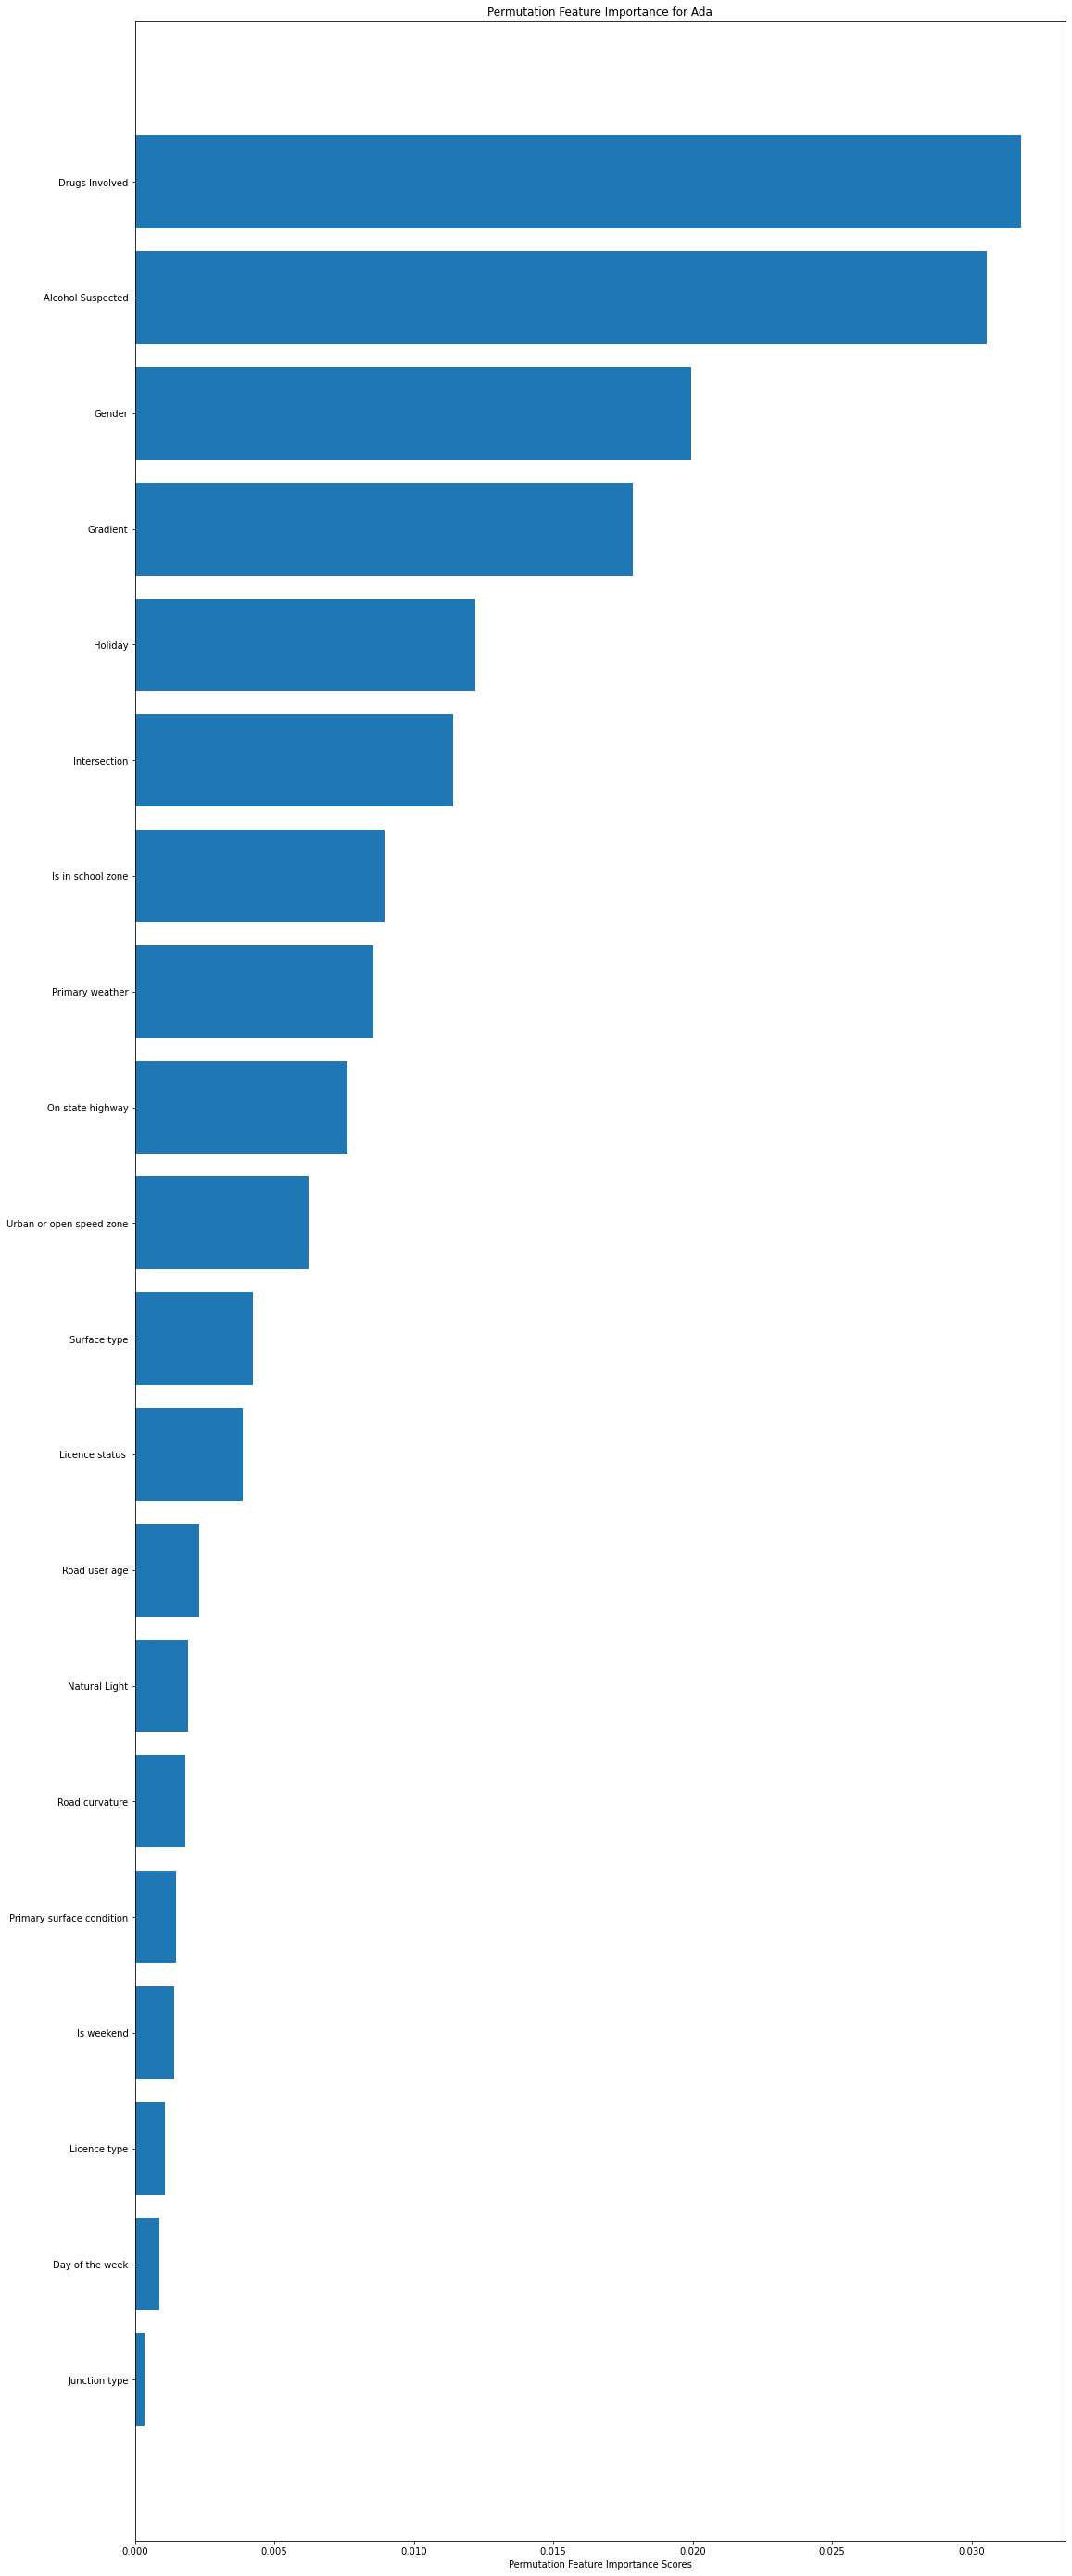

In [43]:
for name, model in clf_models:
  
  results = permutation_importance(model, x, y, scoring='accuracy')
 
  importance = results.importances_mean
  
  sorted_idx = np.argsort(importance)
  pos = np.arange(sorted_idx.shape[0]) + .5
  plt.subplots(figsize=(18,50))
  plt.barh(pos, importance[sorted_idx], align='center')

  print('Feature:, value: %.5f' , (x.columns[sorted_idx],importance[sorted_idx]))
  plt.yticks(pos, x.columns[sorted_idx])
  plt.xlabel('Permutation Feature Importance Scores')
  plt.title('Permutation Feature Importance for %s' % name)
  plt.show()



#PCA Analysis

In [103]:
x_std=StandardScaler().fit_transform(x)
print(x_std[0:5])

[[-1.55276644 -0.63097544 -0.18668539  0.51015427  1.52644817 -0.62335192
  -0.82882769  1.61596145  1.91808059 -0.36395831  0.25565281  0.31806099
   0.85079487 -0.40759241 -1.258271   -0.30360447 -0.54809617 -0.14508238
  -0.94227268 -0.5968381 ]
 [ 1.64206619  1.58484774  5.35660549  0.51015427 -0.6551156  -0.62335192
   1.20652339 -0.62910872  1.91808059  2.74756747  0.25565281  0.31806099
  -0.90037344 -0.40759241  0.68793794 -0.30360447 -0.54809617 -0.14508238
  -0.10296418 -0.5968381 ]
 [-0.48782223 -0.63097544 -0.18668539  0.51015427  1.52644817 -0.62335192
  -0.82882769  1.61596145 -0.52135453 -0.36395831  0.25565281  0.31806099
  -0.02478928 -0.40759241 -1.258271   -0.30360447 -0.54809617 -0.14508238
  -1.20455658  1.67549625]
 [-0.48782223 -0.63097544  5.35660549 -1.96019137 -0.6551156  -0.62335192
   1.20652339 -0.62910872 -0.52135453 -0.36395831  0.25565281  0.31806099
  -0.02478928 -0.40759241  0.68793794 -0.30360447  1.53760368 -0.14508238
   1.36582568  1.67549625]
 [ 0

In [104]:
x_covariance_matrix=np.cov(x_std.T)
x_covariance_matrix


array([[ 1.00004005e+00,  7.31244736e-01,  1.29457306e-02,
        -6.29715651e-02, -7.91834078e-02,  2.20861838e-02,
         6.14433244e-02, -6.76935945e-02,  8.55443959e-02,
         4.00042814e-02, -2.79432732e-02,  1.38231403e-02,
         1.06502552e-01, -2.32095966e-02,  8.56075434e-02,
         3.15849849e-02,  1.10420533e-02,  1.27648558e-02,
        -5.49673664e-02, -4.32214237e-02],
       [ 7.31244736e-01,  1.00004005e+00,  6.17407564e-02,
        -3.01407390e-02, -6.89943562e-02,  2.06753440e-05,
         4.50232827e-02, -7.21626394e-02,  1.20407045e-01,
         4.14761002e-02, -3.02293251e-02,  2.75921901e-02,
         1.73857790e-01, -9.47559633e-03,  9.18008502e-02,
         3.92205339e-02,  3.19534939e-02,  2.12046301e-02,
        -8.58332749e-02, -4.39033133e-02],
       [ 1.29457306e-02,  6.17407564e-02,  1.00004005e+00,
         1.46748982e-03, -6.56166090e-03,  4.63148305e-02,
         4.04525438e-02, -5.41401806e-03,  6.83744296e-02,
         5.63820690e-02, -3.1

In [106]:
eig_val,eig_vec=np.linalg.eig(x_covariance_matrix)
print("Eigenvecotr\n%s",eig_vec)
print("Eigen values \n%s",eig_val)

Eigenvecotr
%s [[ 2.59615544e-01  4.15412079e-01  4.30794118e-01 -6.95316763e-01
   5.68781907e-02  2.04138916e-01  3.15245521e-02  6.84976689e-03
   3.57390346e-03 -3.47115569e-02 -3.21366011e-02  5.49542460e-02
  -4.48446333e-02 -1.39892914e-01 -4.91917377e-02 -5.59135840e-02
  -2.54146763e-02 -6.80243335e-02 -8.44817951e-02 -1.50681478e-02]
 [ 2.68093969e-01  4.52375903e-01  4.08180380e-01  7.11204695e-01
   3.65342492e-02  1.73473613e-01  4.60713862e-02 -1.30515301e-02
   2.85440741e-02 -1.64064657e-02  1.03711662e-02 -7.10207948e-03
  -1.63484701e-02 -7.73564232e-02 -4.42632584e-02  1.83336886e-03
  -4.02996558e-02 -2.21538933e-02 -6.67463299e-02 -3.62189464e-02]
 [ 6.45092342e-02  6.06040894e-02 -3.39367032e-02 -4.31249554e-02
  -1.78027882e-01  1.13071689e-01 -6.57224937e-02 -1.49696230e-02
  -1.47385587e-02  1.42254366e-02 -1.66671081e-02  3.99264974e-02
   5.05032593e-02  4.72293559e-01 -3.47533340e-02  5.04911458e-02
   8.92597352e-02  5.92776948e-01 -4.20602232e-01 -4.149856

In [108]:
eig_pairs=[(np.abs(eig_val[i]),eig_vec[:,i]) for i in range (len(eig_val))]
eig_pairs.sort(key=lambda xe:xe[0], reverse=True)
print("Eigenvalues in descending order:")
for i in eig_pairs:
    print(i[0])

Eigenvalues in descending order:
2.5004225781381653
1.756375313332461
1.6048170939428135
1.409330003293689
1.3585894486917816
1.197430841416116
1.0668004663621533
1.0415674844959866
0.9654018617919651
0.9458776346195416
0.936308399426787
0.8166628109545954
0.7608123047693073
0.716389311765863
0.6271412566090661
0.551259640041427
0.5365912462702488
0.476595196502441
0.4708003149820023
0.26162772167134185


In [110]:
tot=sum(eig_val)
var_exp=[(i/tot)*100 for i in sorted (eig_val, reverse=True)]
cum_var_exp=np.cumsum(var_exp)
print(var_exp)
print(40*'_')
print(cum_var_exp)

[12.501612245452517, 8.781524897730426, 8.023764146413173, 7.046367834423889, 6.7926752209039005, 5.986914452387034, 5.333788732486245, 5.20762887541031, 4.826816012094973, 4.729198785456621, 4.681354525485799, 4.0831505390731975, 3.8039091907725355, 3.5818031203158225, 3.13558071415685, 2.756187824658509, 2.682848792770777, 2.3828805565958757, 2.3539073092694953, 1.3080862241420532]
________________________________________
[ 12.50161225  21.28313714  29.30690129  36.35326912  43.14594434
  49.1328588   54.46664753  59.67427641  64.50109242  69.2302912
  73.91164573  77.99479627  81.79870546  85.38050858  88.51608929
  91.27227712  93.95512591  96.33800647  98.69191378 100.        ]


In [116]:
import pprint

print("All eigen values along with eigen vectors")
pprint.pprint(eig_pairs)

All eigen values along with eigen vectors
[(2.5004225781381653,
  array([ 0.25961554,  0.26809397,  0.06450923, -0.24927708, -0.36239123,
        0.1790195 ,  0.38232117, -0.34495472,  0.33026336,  0.21391569,
       -0.18737603, -0.01197803,  0.1770833 ,  0.06025288,  0.15744467,
        0.21063909,  0.13193834,  0.05413251, -0.18131864, -0.13578717])),
 (1.756375313332461,
  array([ 0.41541208,  0.4523759 ,  0.06060409,  0.22120273,  0.27374301,
       -0.12207608, -0.26178244,  0.21039127, -0.02862067, -0.0598978 ,
        0.13687959, -0.18235825,  0.35621615,  0.21034398,  0.18124081,
       -0.0349046 ,  0.1449537 ,  0.08363455, -0.27224786,  0.06188096])),
 (1.6048170939428135,
  array([ 0.43079412,  0.40818038, -0.0339367 , -0.01732292, -0.06198813,
       -0.13015191, -0.08020062, -0.02436839, -0.10415492, -0.09002918,
       -0.04943671,  0.4396354 , -0.22519963, -0.50486816, -0.0750209 ,
       -0.0361241 , -0.19704549, -0.05118294,  0.21698724, -0.05290313])),
 (1.4093300032

In [132]:
matrix_w=np.hstack(( 
     eig_pairs[0][1].reshape(20,1), 
     eig_pairs[1][1].reshape(20,1),
     eig_pairs[2][1].reshape(20,1),
     eig_pairs[3][1].reshape(20,1),
       eig_pairs[4][1].reshape(20,1), 
     eig_pairs[5][1].reshape(20,1),
     eig_pairs[6][1].reshape(20,1),
     eig_pairs[7][1].reshape(20,1),
       eig_pairs[8][1].reshape(20,1), 
     eig_pairs[9][1].reshape(20,1),
     eig_pairs[10][1].reshape(20,1),
     eig_pairs[11][1].reshape(20,1),   
    eig_pairs[12][1].reshape(20,1), 
     eig_pairs[13][1].reshape(20,1),
     eig_pairs[14][1].reshape(20,1),
     eig_pairs[15][1].reshape(20,1)))
    
matrix_w          
                    
    
                   

array([[ 2.59615544e-01,  4.15412079e-01,  4.30794118e-01,
         5.68781907e-02,  2.04138916e-01,  3.15245521e-02,
        -4.48446333e-02, -1.39892914e-01, -6.80243335e-02,
        -8.44817951e-02, -1.50681478e-02, -2.54146763e-02,
        -5.59135840e-02, -4.91917377e-02,  5.49542460e-02,
        -3.21366011e-02],
       [ 2.68093969e-01,  4.52375903e-01,  4.08180380e-01,
         3.65342492e-02,  1.73473613e-01,  4.60713862e-02,
        -1.63484701e-02, -7.73564232e-02, -2.21538933e-02,
        -6.67463299e-02, -3.62189464e-02, -4.02996558e-02,
         1.83336886e-03, -4.42632584e-02, -7.10207948e-03,
         1.03711662e-02],
       [ 6.45092342e-02,  6.06040894e-02, -3.39367032e-02,
        -1.78027882e-01,  1.13071689e-01, -6.57224937e-02,
         5.05032593e-02,  4.72293559e-01,  5.92776948e-01,
        -4.20602232e-01, -4.14985642e-01,  8.92597352e-02,
         5.04911458e-02, -3.47533340e-02,  3.99264974e-02,
        -1.66671081e-02],
       [-2.49277078e-01,  2.21202727e

In [135]:
ye=x_std.dot(matrix_w)
print(ye[:5])

[[-1.71089889  0.29375709 -0.89310696 -1.20098134 -0.71402219  0.33576096
  -0.72120493  0.12730278  0.3914511   1.95047445 -0.84314093 -0.4862528
   1.64314398  0.33173488 -1.35554018 -0.8653285 ]
 [ 2.92309601  0.67097465  1.37659327 -2.22059131  1.73892125  0.67981679
  -0.34209876  3.66701604  2.20457807 -0.93674615 -2.6617781   0.74772442
  -0.87083596 -1.2188289   0.28660429 -0.53088364]
 [-2.65612709  0.7060893  -0.16020073 -1.21517572 -0.40187651  0.17204394
  -0.06868128 -0.26032002 -0.0913721  -0.18619585  0.41164242 -0.61020178
   1.49062478  0.2753532   0.41419666 -1.05113472]
 [ 0.77599763 -1.15148066 -0.27806873 -1.33926711  0.58405777 -0.73376288
   0.27506643  2.20594504  2.89789152 -4.21074203 -0.70213093  1.89507567
   0.55085259  0.30008496 -0.26363245  1.70674833]
 [ 0.61741953 -1.14674773  0.05703008  0.13806232  0.12317574 -1.57788989
   0.91045676 -0.28564077  0.2116885   0.29231184  0.16810185 -0.70977892
  -1.34598459 -0.04158532  0.24382958 -1.03157706]]


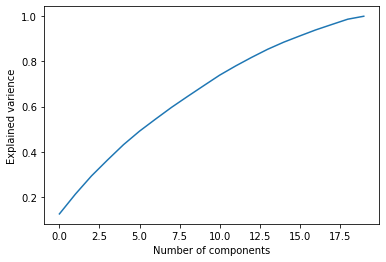

In [145]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
pca=PCA().fit(x_std)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Explained varience')
plt.show()

In [190]:
# Metrics dictionary
accuracy = dict()
precision = dict()
recall = dict()
f1 = dict()
fpr = dict()
tpr = dict()
# List of classification algorithms
#algo_lst=['Decision Tree','Random Forest','Logistic Regression','Artificial Neural Network']
# Initialize an empty list for the accuracy for each algorithm
accuracy_lst=[]
precision_lst=[]
f1Score_lst=[]
recall_lst=[]

In [191]:

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.80)


#RF

In [192]:
M_RF = RandomForestClassifier(n_estimators=250,criterion='entropy')
M_RF.fit(x_train,y_train)
RF_Pred = M_RF.predict(x_train)
RF_Pred1 = M_RF.predict(x_test)

In [193]:
acc_random_forest = round(M_RF.score(x_train, y_train) * 100, 2)
acc_random_forest1 = round(M_RF.score(x_test, y_test) * 100, 2)
f1_Score2 = round(f1_score(y_test, RF_Pred1, average='macro') * 100, 2)
P_Score2 = round(precision_score(y_test, RF_Pred1, average='macro') * 100, 2)
R_Score2 = round(recall_score(y_test, RF_Pred1, average='macro') * 100, 2)
# Append to the accuracy list
accuracy_lst.append(acc_random_forest1)
precision_lst.append(P_Score2)
f1Score_lst.append(f1_Score2)
recall_lst.append(R_Score2)

print("\nTrain Accuracy", acc_random_forest)
print("Test Accuracy", acc_random_forest1)
print("F1 Score", f1_Score2)
print("Precision Score", P_Score2)
print("Recall Score", R_Score2)


Train Accuracy 98.84
Test Accuracy 67.67
F1 Score 67.25
Precision Score 66.78
Recall Score 67.97


###### print('\nClassification Report for Training\n')
c_rf = classification_report(y_test,RF_Pred1)
print(c_rf)

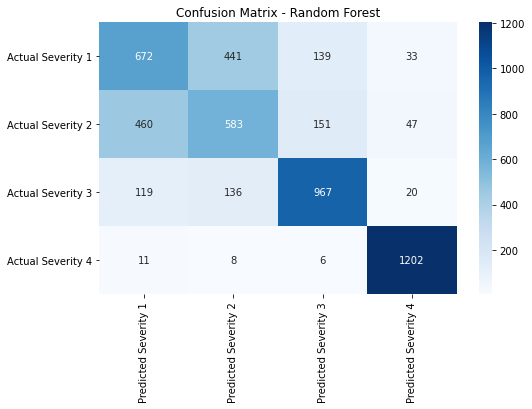

In [96]:
y_pred = M_RF.predict(x_test)
confmat = confusion_matrix(y_true=y_test, y_pred=RF_Pred1)

index = ["Actual Severity 1", "Actual Severity 2","Actual Severity 3", "Actual Severity 4"]
columns = ["Predicted Severity 1", "Predicted Severity 2","Predicted Severity 3", "Predicted Severity 4"]
conf_matrix = pd.DataFrame(data=confmat, columns=columns, index=index)
plt.figure(figsize=(8, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - Random Forest")
plt.show()

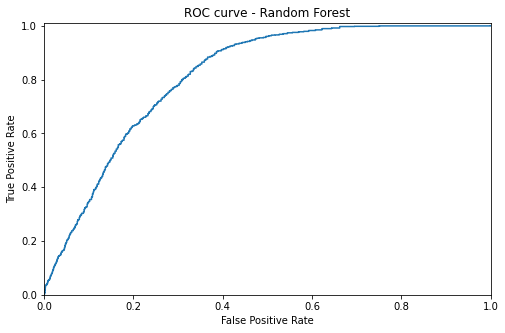

In [97]:
Ye = label_binarize(y_test, classes=[1, 2])
y_score = M_RF.predict_proba(x_test)
fpr["Random Forest"], tpr["Random Forest"], _= roc_curve(Ye[:,0], y_score[:,0])

plt.figure(figsize=(8, 5))
plt.step(fpr["Random Forest"], tpr["Random Forest"], where="post")

plt.title("ROC curve - Random Forest")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.xlim([0, 1])
plt.ylim([0, 1.01])
plt.show()

In [194]:
xtrain, xval, ytrain, yval = train_test_split(x_train, y_train, train_size=0.8) 

#LR

In [195]:
acc=np.zeros(6)
i=0
for c in [0.5, 0.1, 0.01, 0.001, 10, 100]:
    lr = LogisticRegression(C=c, solver='liblinear').fit(xtrain, ytrain)
    yhat = lr.predict(xval)
    acc[i] = accuracy_score(yval,yhat)
    i+=1
acc

array([0.48373373, 0.48298298, 0.47572573, 0.43893894, 0.48423423,
       0.48448448])

In [196]:
M_LR = LogisticRegression(C=0.001, solver='liblinear').fit(x_train, y_train)
#t_lr = time.time()-t0
#print('Time taken :' , t_lr)
LR_Pred = M_LR.predict(x_train)
LR_Pred1 = M_LR.predict(x_test)



In [197]:

acc_lr = round(M_LR.score(x_train, y_train) * 100, 2)
acc_lr1 = round(M_LR.score(x_test, y_test) * 100, 2)
f1_Score1 = round(f1_score(y_test, LR_Pred1, average='macro') * 100, 2)
P_Score1 = round(precision_score(y_test, LR_Pred1, average='macro') * 100, 2)
R_Score1 = round(recall_score(y_test, LR_Pred1, average='macro') * 100, 2)
# Append to the accuracy list
accuracy_lst.append(acc_lr1)
precision_lst.append(P_Score1)
f1Score_lst.append(f1_Score1)
print("\nTrain Accuracy", acc_lr)
print("Test Accuracy", acc_lr1)
print("F1 Score", f1_Score1)
print("Precision Score", P_Score1)
print("Recall Score", R_Score1)


Train Accuracy 45.2
Test Accuracy 44.98
F1 Score 43.04
Precision Score 44.17
Recall Score 45.14


In [86]:
print('\nClassification Report for Training\n')
c_lr = classification_report(y_test,LR_Pred1)
print(c_lr)


Classification Report for Training

              precision    recall  f1-score   support

           1       0.43      0.61      0.51      1251
           2       0.41      0.22      0.29      1261
           3       0.45      0.36      0.40      1205
           4       0.55      0.67      0.60      1278

    accuracy                           0.47      4995
   macro avg       0.46      0.47      0.45      4995
weighted avg       0.46      0.47      0.45      4995



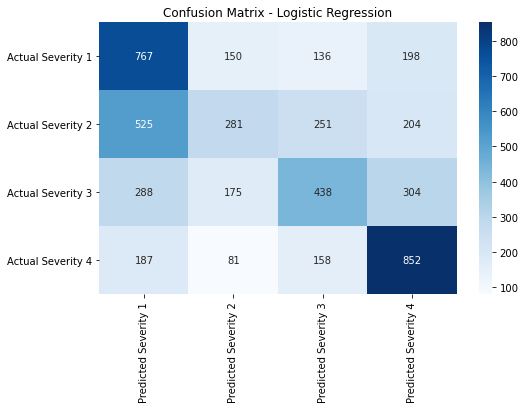

In [33]:
y_pred = M_LR.predict(x_test)
confmat = confusion_matrix(y_true=y_test, y_pred=LR_Pred1)

index = ["Actual Severity 1", "Actual Severity 2","Actual Severity 3", "Actual Severity 4"]
columns = ["Predicted Severity 1", "Predicted Severity 2","Predicted Severity 3", "Predicted Severity 4"]
conf_matrix = pd.DataFrame(data=confmat, columns=columns, index=index)
plt.figure(figsize=(8, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - Logistic Regression")
plt.show()

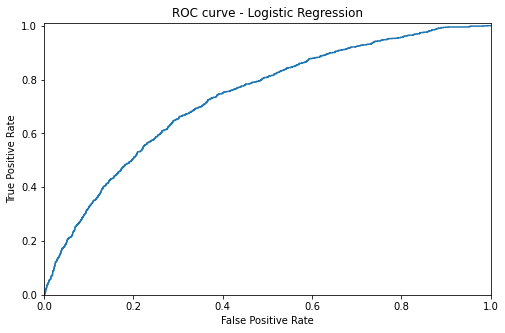

In [35]:
y_scoreLR = M_LR.predict_proba(x_test)
fpr["Logistic Regression"], tpr["Logistic Regression"], _= roc_curve(Ye[:,0], y_scoreLR[:,0])

plt.figure(figsize=(8, 5))
plt.step(fpr["Logistic Regression"],tpr["Logistic Regression"],  where="post")

plt.title("ROC curve - Logistic Regression")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.xlim([0, 1])
plt.ylim([0, 1.01])
plt.show()

In [198]:
tt = x_train.shape[0]
tv = xval.shape[0]
x_train[int(tt*0.5):].shape[0], xval[int(tv*0.5):].shape[0]

(9989, 1998)

#KNN

In [199]:
ks = 50
mean_acc = np.zeros(ks-1)
std_acc = np.zeros(ks-1)

for n in range(1,ks):
    neigh = KNeighborsClassifier(n_neighbors = n).fit(x_train[int(tt*0.5):],y_train[int(tt*0.5):])
    yhat = neigh.predict(xval[int(tv*0.5):])
    mean_acc[n-1] = accuracy_score(yval[int(tv*0.5):],yhat)
    std_acc[n-1] = np.std(yhat==yval[int(tv*0.5):])/np.sqrt(yhat.shape[0])
print('Best performing K is '+ str(mean_acc.argmax()+1) + ' with an accuracy of ' +str(mean_acc.max()))

Best performing K is 1 with an accuracy of 0.7992992992992993


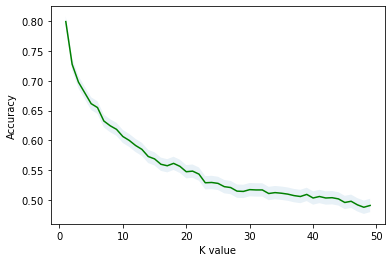

In [200]:
plt.plot(range(1,ks),mean_acc,'g')
plt.xlabel('K value')
plt.ylabel('Accuracy')
#plt.title('Evaluation of accuracy incrementing the value of K')
plt.fill_between(range(1,ks),mean_acc-1*std_acc,mean_acc+1*std_acc, alpha=0.1)

In [201]:
model_knn = KNeighborsClassifier(n_neighbors = 1, n_jobs=-1)
model_knn.fit(x_train,y_train)
LR_Pred = M_LR.predict(x_train)

knn_Pred1 = model_knn.predict(x_test)
acc_knn = round(model_knn.score(x_train, y_train) * 100, 2)
acc_knn1 = round(model_knn.score(x_test, y_test) * 100, 2)
f1_Score1 = round(f1_score(y_test, knn_Pred1, average='macro') * 100, 2)
P_Score1 = round(precision_score(y_test, knn_Pred1, average='macro') * 100, 2)
R_Score1 = round(recall_score(y_test, knn_Pred1, average='macro') * 100, 2)
# Append to the accuracy list
accuracy_lst.append(acc_lr1)
precision_lst.append(P_Score1)
f1Score_lst.append(f1_Score1)
print("\nTrain Accuracy", acc_lr)
print("Test Accuracy", acc_lr1)
print("F1 Score", f1_Score1)
print("Precision Score", P_Score1)
print("Recall Score", R_Score1)


Train Accuracy 45.2
Test Accuracy 44.98
F1 Score 64.52
Precision Score 63.84
Recall Score 66.14


In [42]:
print('\nClassification Report for Training\n')
c_knn = classification_report(y_test,knn_Pred1)
print(c_knn)



Classification Report for Training

              precision    recall  f1-score   support

           1       0.49      0.42      0.45      1251
           2       0.49      0.41      0.45      1261
           3       0.69      0.85      0.76      1205
           4       0.91      0.99      0.95      1278

    accuracy                           0.67      4995
   macro avg       0.64      0.67      0.65      4995
weighted avg       0.65      0.67      0.65      4995



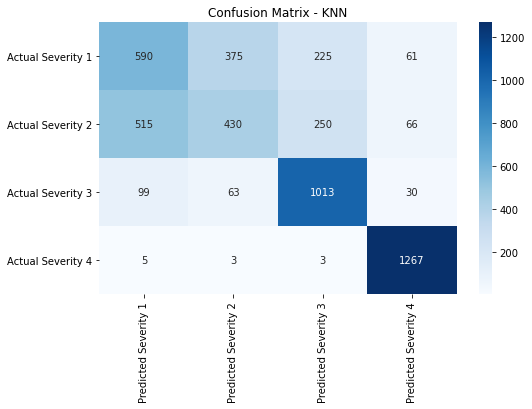

In [44]:
y_pred = model_knn.predict(x_test)
confmat = confusion_matrix(y_true=y_test, y_pred=yhat)

index = ["Actual Severity 1", "Actual Severity 2","Actual Severity 3", "Actual Severity 4"]
columns = ["Predicted Severity 1", "Predicted Severity 2","Predicted Severity 3", "Predicted Severity 4"]
conf_matrix = pd.DataFrame(data=confmat, columns=columns, index=index)
plt.figure(figsize=(8, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - KNN")
plt.show()

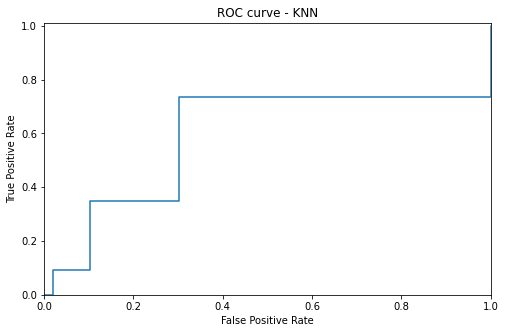

In [46]:
y_scoreKNN = model_knn.predict_proba(x_test)
fpr["KNN"], tpr["KNN"], _= roc_curve(Ye[:,0], y_scoreKNN[:,0])

plt.figure(figsize=(8, 5))
plt.step(fpr["KNN"],tpr["KNN"],  where="post")

plt.title("ROC curve - KNN")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.xlim([0, 1])
plt.ylim([0, 1.01])
plt.show()

#NB

In [204]:
M_NB=GaussianNB()
M_NB.fit(x_train,y_train)
NB_Pred = M_NB.predict(x_train)
NB_Pred1 = M_NB.predict(x_test)

In [205]:
acc_NB = round(M_NB.score(x_train, y_train) * 100, 2)
acc_NB1 = round(M_NB.score(x_test, y_test) * 100, 2)
f1_Score2 = round(f1_score(y_test, NB_Pred1, average='macro') * 100, 2)
P_Score2 = round(precision_score(y_test, NB_Pred1, average='macro') * 100, 2)
R_Score2 = round(recall_score(y_test, NB_Pred1, average='macro') * 100, 2)
# Append to the accuracy list
accuracy_lst.append(acc_NB1)
precision_lst.append(P_Score2)
f1Score_lst.append(f1_Score2)
recall_lst.append(R_Score2)

print("\nTrain Accuracy", acc_NB)
print("Test Accuracy", acc_NB1)
print("F1 Score", f1_Score2)
print("Precision Score", P_Score2)
print("Recall Score", R_Score2)


Train Accuracy 44.05
Test Accuracy 44.32
F1 Score 42.88
Precision Score 46.29
Recall Score 44.58


In [49]:
print('\nClassification Report for Training\n')
c_nb = classification_report(y_test,NB_Pred1)
print(c_nb)


Classification Report for Training

              precision    recall  f1-score   support

           1       0.49      0.39      0.43      1251
           2       0.47      0.14      0.21      1261
           3       0.33      0.63      0.43      1205
           4       0.60      0.63      0.62      1278

    accuracy                           0.45      4995
   macro avg       0.47      0.45      0.42      4995
weighted avg       0.48      0.45      0.43      4995



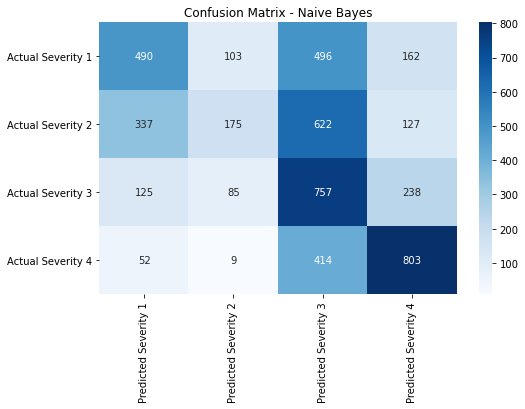

In [50]:
y_pred = M_NB.predict(x_test)
confmat = confusion_matrix(y_true=y_test, y_pred=NB_Pred1)

index = ["Actual Severity 1", "Actual Severity 2","Actual Severity 3", "Actual Severity 4"]
columns = ["Predicted Severity 1", "Predicted Severity 2","Predicted Severity 3", "Predicted Severity 4"]
conf_matrix = pd.DataFrame(data=confmat, columns=columns, index=index)
plt.figure(figsize=(8, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - Naive Bayes")
plt.show()

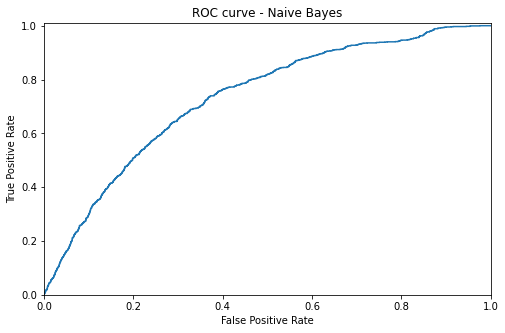

In [51]:
y_scoreNB = M_NB.predict_proba(x_test)
fpr["Naive Bayes"], tpr["Naive Bayes"], _= roc_curve(Ye[:,0], y_scoreNB[:,0])

plt.figure(figsize=(8, 5))
plt.step(fpr["Naive Bayes"],tpr["Naive Bayes"],  where="post")

plt.title("ROC curve - Naive Bayes")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.xlim([0, 1])
plt.ylim([0, 1.01])
plt.show()

#ADA Boost

In [206]:
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, ExtraTreesClassifier, AdaBoostClassifier, GradientBoostingClassifier, StackingClassifier
M_ADB = AdaBoostClassifier()
M_ADB.fit(x_train,y_train)
ADB_Pred = M_ADB.predict(x_train)
ADB_Pred1 = M_ADB.predict(x_test)

In [207]:
acc_adb = round(M_ADB.score(x_train, y_train) * 100, 2)
acc_adb1 = round(M_ADB.score(x_test, y_test) * 100, 2)
f1_Score2 = round(f1_score(y_test, ADB_Pred1, average='macro') * 100, 2)
P_Score2 = round(precision_score(y_test, ADB_Pred1, average='macro') * 100, 2)
R_Score2 = round(recall_score(y_test, ADB_Pred1, average='macro') * 100, 2)
# Append to the accuracy list
accuracy_lst.append(ADB_Pred1)
precision_lst.append(P_Score2)
f1Score_lst.append(f1_Score2)
recall_lst.append(R_Score2)

print("\nTrain Accuracy", acc_adb)
print("Test Accuracy", acc_adb1)
print("F1 Score", f1_Score2)
print("Precision Score", P_Score2)
print("Recall Score", R_Score2)


Train Accuracy 50.38
Test Accuracy 50.51
F1 Score 49.58
Precision Score 50.07
Recall Score 50.68


In [54]:
print('\nClassification Report for Training\n')
c_adb = classification_report(y_test,ADB_Pred1)
print(c_adb)


Classification Report for Training

              precision    recall  f1-score   support

           1       0.46      0.54      0.50      1251
           2       0.45      0.29      0.35      1261
           3       0.43      0.49      0.46      1205
           4       0.65      0.69      0.67      1278

    accuracy                           0.50      4995
   macro avg       0.50      0.50      0.49      4995
weighted avg       0.50      0.50      0.50      4995



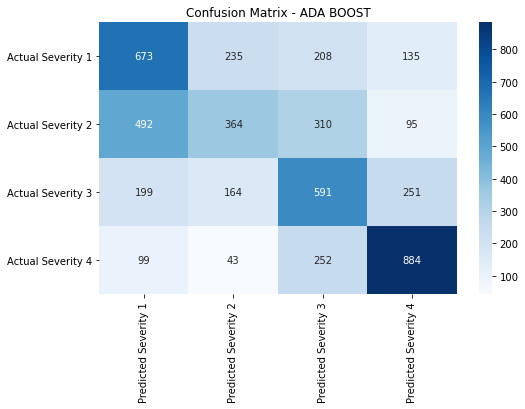

In [55]:
y_pred = M_ADB.predict(x_test)
confmat = confusion_matrix(y_true=y_test, y_pred=ADB_Pred1)

index = ["Actual Severity 1", "Actual Severity 2","Actual Severity 3", "Actual Severity 4"]
columns = ["Predicted Severity 1", "Predicted Severity 2","Predicted Severity 3", "Predicted Severity 4"]
conf_matrix = pd.DataFrame(data=confmat, columns=columns, index=index)
plt.figure(figsize=(8, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - ADA BOOST")
plt.show()

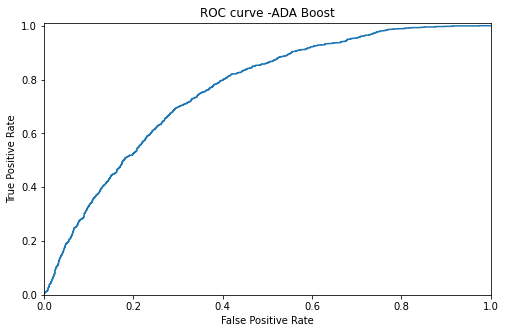

In [56]:
y_scoreADB = M_ADB.predict_proba(x_test)
fpr["ADA Boost"], tpr["ADA Boost"], _= roc_curve(Ye[:,0], y_scoreADB[:,0])

plt.figure(figsize=(8, 5))
plt.step(fpr["ADA Boost"],tpr["ADA Boost"],  where="post")

plt.title("ROC curve -ADA Boost")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.xlim([0, 1])
plt.ylim([0, 1.01])
plt.show()

#XGBoost

In [208]:
ML_XG = XGBClassifier(n_estimators=100)
ML_XG.fit(x_train,y_train)
XG_Pred = ML_XG.predict(x_train)
XG_Pred1 = ML_XG.predict(x_test)
                

C:\Users\sahmed1\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:26:53] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [209]:
acc_XG = round(ML_XG.score(x_train, y_train) * 100, 2)
acc_XG1 = round(ML_XG.score(x_test, y_test) * 100, 2)
f1_Score2 = round(f1_score(y_test, XG_Pred1, average='macro') * 100, 2)
P_Score2 = round(precision_score(y_test, XG_Pred1, average='macro') * 100, 2)
R_Score2 = round(recall_score(y_test, XG_Pred1, average='macro') * 100, 2)
# Append to the accuracy list
accuracy_lst.append(acc_XG1)
precision_lst.append(P_Score2)
f1Score_lst.append(f1_Score2)
recall_lst.append(R_Score2)

print("\nTrain Accuracy", acc_XG)
print("Test Accuracy", acc_XG1)
print("F1 Score", f1_Score2)
print("Precision Score", P_Score2)
print("Recall Score", R_Score2)


Train Accuracy 78.68
Test Accuracy 65.07
F1 Score 64.3
Precision Score 63.78
Recall Score 65.38


In [59]:
print('\nClassification Report for Training\n')
c_xgb = classification_report(y_test,XG_Pred1)
print(c_xgb)


Classification Report for Training

              precision    recall  f1-score   support

           1       0.51      0.53      0.52      1251
           2       0.49      0.40      0.44      1261
           3       0.66      0.69      0.67      1205
           4       0.88      0.96      0.92      1278

    accuracy                           0.65      4995
   macro avg       0.63      0.65      0.64      4995
weighted avg       0.63      0.65      0.64      4995



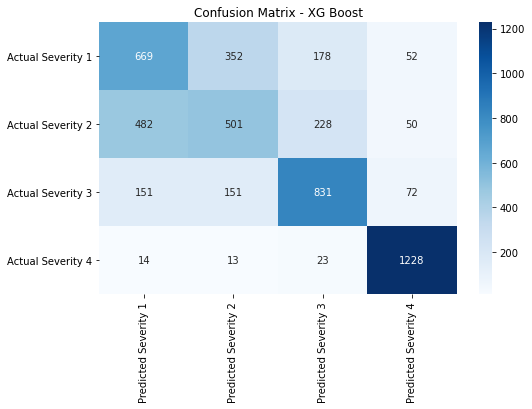

In [61]:
y_pred = ML_XG.predict(x_test)
confmat = confusion_matrix(y_true=y_test, y_pred=XG_Pred1)

index = ["Actual Severity 1", "Actual Severity 2","Actual Severity 3", "Actual Severity 4"]
columns = ["Predicted Severity 1", "Predicted Severity 2","Predicted Severity 3", "Predicted Severity 4"]
conf_matrix = pd.DataFrame(data=confmat, columns=columns, index=index)
plt.figure(figsize=(8, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - XG Boost")
plt.show()

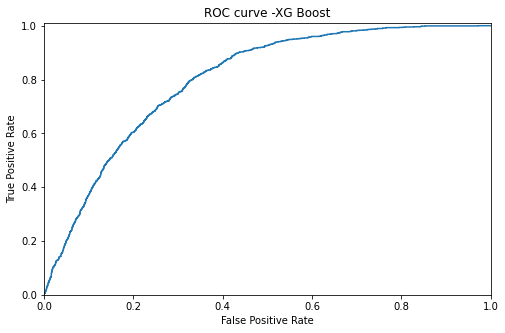

In [62]:
y_scoreXG = ML_XG.predict_proba(x_test)
fpr["XG Boost"], tpr["XG Boost"], _= roc_curve(Ye[:,0], y_scoreXG[:,0])

plt.figure(figsize=(8, 5))
plt.step(fpr["XG Boost"], tpr["XG Boost"], where="post")

plt.title("ROC curve -XG Boost")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.xlim([0, 1])
plt.ylim([0, 1.01])
plt.show()

#ROC Curve Ensemble Model

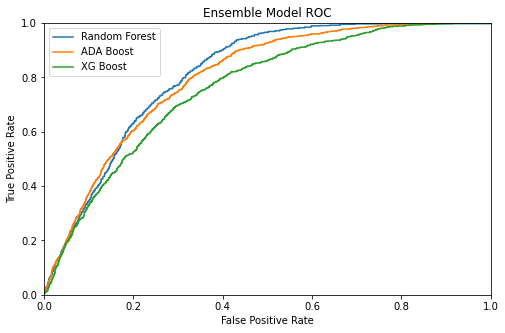

In [63]:
fpr["ADA Boost"], tpr["ADA Boost"], _= roc_curve(Ye[:,0], y_scoreADB[:,0])
fpr["XG Boost"], tpr["XG Boost"], _= roc_curve(Ye[:,0], y_scoreXG[:,0])
fpr["Random Forest"], tpr["Random Forest"], _= roc_curve(Ye[:,0], y_score[:,0])



plt.figure(figsize=(8, 5))
plt.step(fpr["Random Forest"], tpr["Random Forest"], where="post", label='Random Forest')
plt.step(fpr["XG Boost"], tpr["XG Boost"], where="post", label='ADA Boost')
plt.step(fpr["ADA Boost"], tpr["ADA Boost"], where="post",label='XG Boost')
plt.title("Ensemble Model ROC")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.show()

#ROC Curve  Single Model

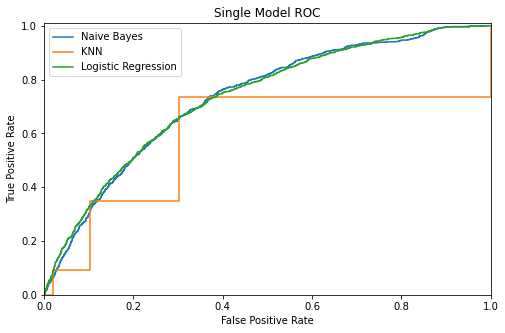

In [64]:
fpr["KNN"], tpr["KNN"], _= roc_curve(Ye[:,0], y_scoreKNN[:,0])
fpr["Logistic Regression"], tpr["Logistic Regression"], _= roc_curve(Ye[:,0], y_scoreLR[:,0])
fpr["Naive Bayes"], tpr["Naive Bayes"], _= roc_curve(Ye[:,0], y_scoreNB[:,0])

plt.figure(figsize=(8, 5))
plt.step(fpr["Naive Bayes"],tpr["Naive Bayes"],  where="post", label='Naive Bayes ')
plt.step(fpr["KNN"],tpr["KNN"],  where="post", label='KNN')
plt.step(fpr["Logistic Regression"],tpr["Logistic Regression"],  where="post", label='Logistic Regression')
plt.title("Single Model ROC")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.xlim([0, 1])
plt.ylim([0, 1.01])
plt.show()

#ROC Curve for both model

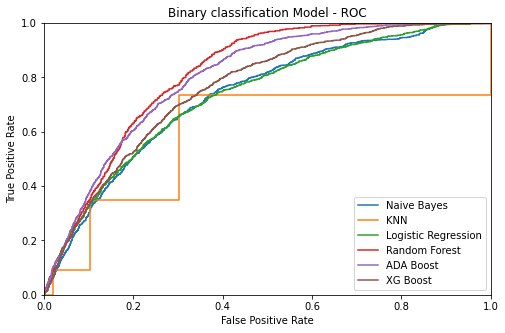

In [65]:
fpr["ADA Boost"], tpr["ADA Boost"], _= roc_curve(Ye[:,0], y_scoreADB[:,0])
fpr["XG Boost"], tpr["XG Boost"], _= roc_curve(Ye[:,0], y_scoreXG[:,0])
fpr["Random Forest"], tpr["Random Forest"], _= roc_curve(Ye[:,0], y_score[:,0])

fpr["KNN"], tpr["KNN"], _= roc_curve(Ye[:,0], y_scoreKNN[:,0])
fpr["Logistic Regression"], tpr["Logistic Regression"], _= roc_curve(Ye[:,0], y_scoreLR[:,0])
fpr["Naive Bayes"], tpr["Naive Bayes"], _= roc_curve(Ye[:,0], y_scoreNB[:,0])

plt.figure(figsize=(8, 5))
plt.step(fpr["Naive Bayes"],tpr["Naive Bayes"],  where="post", label='Naive Bayes ')
plt.step(fpr["KNN"],tpr["KNN"],  where="post", label='KNN')
plt.step(fpr["Logistic Regression"],tpr["Logistic Regression"],  where="post", label='Logistic Regression')
plt.step(fpr["Random Forest"], tpr["Random Forest"], where="post", label='Random Forest')
plt.step(fpr["XG Boost"],tpr["XG Boost"],  where="post", label='ADA Boost')
plt.step(fpr["ADA Boost"],tpr["ADA Boost"],  where="post",label='XG Boost')
plt.title("Binary classification Model - ROC")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.show()